<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-pml-decision-trees-and-svms?scriptVersionId=105644634" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-wine/wine.data


In [2]:
uci_wine = pd.read_csv('/kaggle/input/uci-wine/wine.data',header=None)
uci_wine[0] = uci_wine[0].astype('category')

uci_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Stratified sampling 80/20 split
uci_wine_train = uci_wine.groupby(0, group_keys=False).apply(lambda group: group.sample(frac=0.8))
uci_wine_test = uci_wine.drop(uci_wine_train.index)

# Show the distribution of the classes
uci_wine_test[0].value_counts()/len(uci_wine_test)

2    0.388889
1    0.333333
3    0.277778
Name: 0, dtype: float64

In [4]:
train_targets = uci_wine_train[0]
train_features = uci_wine_train.drop(0, axis=1)

test_targets = uci_wine_test[0]
test_features = uci_wine_test.drop(0, axis=1)

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svc_classifier.fit(train_features, train_targets)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [6]:
from sklearn.svm import LinearSVC

linear_classifier = make_pipeline(StandardScaler(), LinearSVC())
linear_classifier.fit(uci_wine_train.drop(0, axis=1), uci_wine_train[0])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [7]:
svc_classifier.score(uci_wine_test.drop(0, axis=1), uci_wine_test[0])

0.9722222222222222

In [8]:
linear_classifier.score(uci_wine_test.drop(0, axis=1), uci_wine_test[0])

0.9722222222222222

In [9]:
# Import decision tree functionality
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

train_targets_onehot = pd.get_dummies(train_targets)
test_targets_onehot = pd.get_dummies(test_targets)

# Create decision tree and fit it to the data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_features, train_targets)

DecisionTreeClassifier()

In [10]:
decision_tree.score(test_features, test_targets)

0.9444444444444444

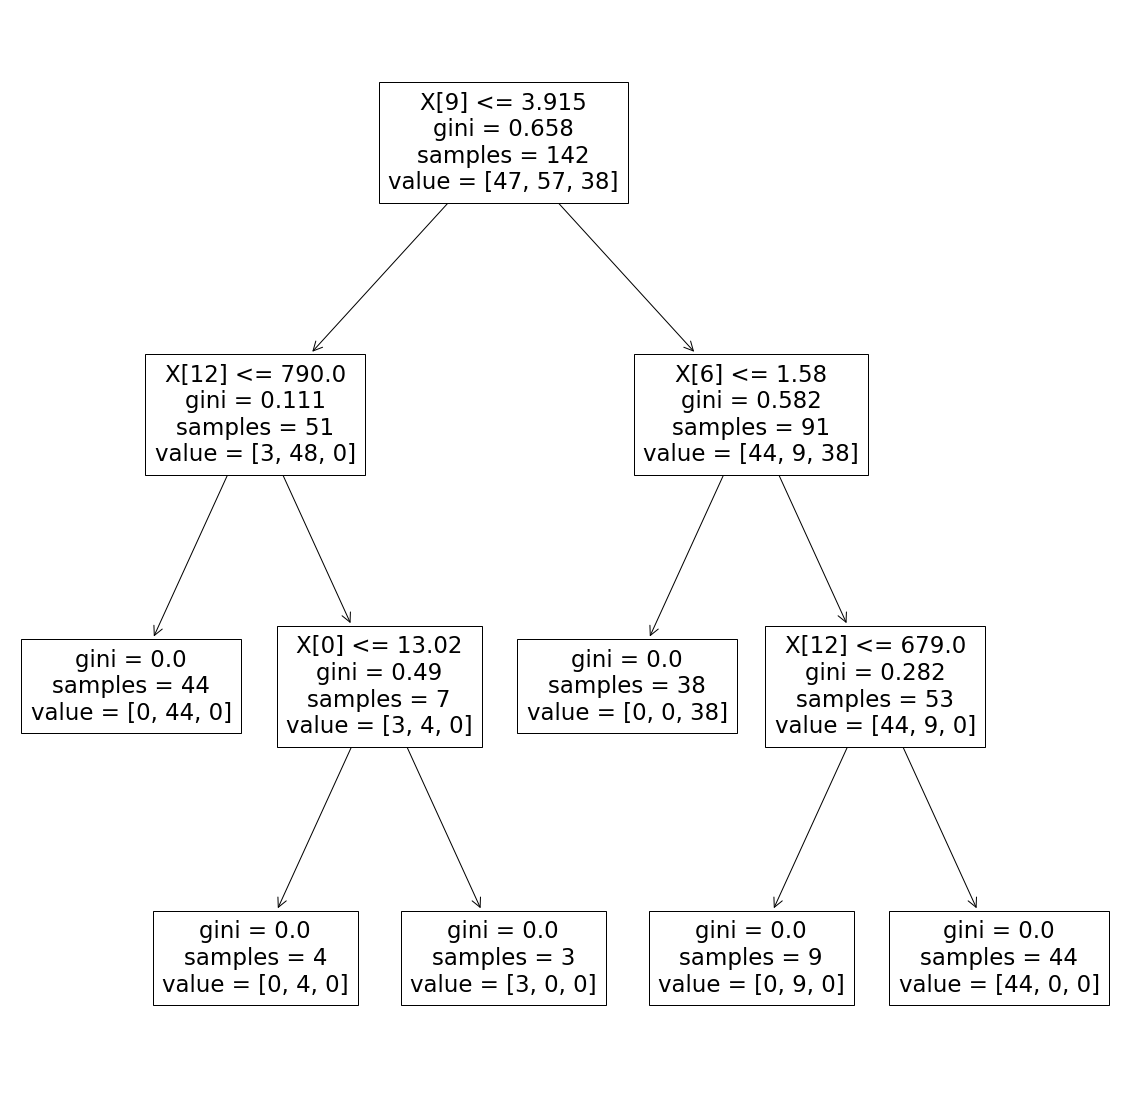

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(decision_tree)
plt.show()